In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as wi

In [3]:
df = pd.read_csv("./co2_emissions_kt_by_country.csv")
df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [4]:
df.shape

(13953, 4)

This dataset contain 13953 and 4 columns.

In [5]:
df.columns

Index(['country_code', 'country_name', 'year', 'value'], dtype='object')

It has 'country_code', 'country_name', 'year', 'value' columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


In [7]:
df.duplicated().sum()

0

This dataset doesn't contain any duplicate values.

In [8]:
df.isnull().sum()

country_code    0
country_name    0
year            0
value           0
dtype: int64

Any of the columns hasn't an null values in this dataset.

In [9]:
df.describe()

,year,value
count,13953.000000,1.395300e+04
mean,1990.732316,8.254983e+05
std,17.187585,2.788923e+06
min,1960.000000,-8.067400e+01
25%,1976.000000,1.100000e+03
50%,1992.000000,1.390000e+04
75%,2006.000000,1.642779e+05
max,2019.000000,3.434401e+07


In [132]:
c = np.sort(df['country_name'].unique())
def plot(Country):
    du = df[df['country_name'] == Country]
    sns.set()
    plt.figure(figsize = (12, 6))
    sns.lineplot(x = 'year', y = 'value', data = du,hue = 'country_name')
    plt.show()

wi.interact(plot, Country = c);

interactive(children=(Dropdown(description='Country', options=('Afghanistan', 'Africa Eastern and Southern', '…

In [139]:
total = df.groupby('year')['value'].sum()
total

year
1960    7.703980e+07
1961    7.630320e+07
1962    7.859003e+07
1963    8.311816e+07
1964    8.770606e+07
1965    9.269911e+07
1966    9.771524e+07
1967    1.008684e+08
1968    1.063929e+08
1969    1.136738e+08
1970    1.241515e+08
1971    1.303641e+08
1972    1.366666e+08
1973    1.441161e+08
1974    1.453979e+08
1975    1.481563e+08
1976    1.560993e+08
1977    1.616111e+08
1978    1.685185e+08
1979    1.731335e+08
1980    1.738361e+08
1981    1.699399e+08
1982    1.713624e+08
1983    1.737702e+08
1984    1.787891e+08
1985    1.871233e+08
1986    1.901554e+08
1987    1.954863e+08
1988    2.030731e+08
1989    2.057422e+08
1990    1.770351e+08
1991    1.784918e+08
1992    1.784469e+08
1993    1.794468e+08
1994    1.797755e+08
1995    1.856091e+08
1996    1.891167e+08
1997    1.920132e+08
1998    1.932884e+08
1999    1.938037e+08
2000    2.002524e+08
2001    2.044489e+08
2002    2.083541e+08
2003    2.197574e+08
2004    2.316484e+08
2005    2.421461e+08
2006    2.522002e+08
2007    

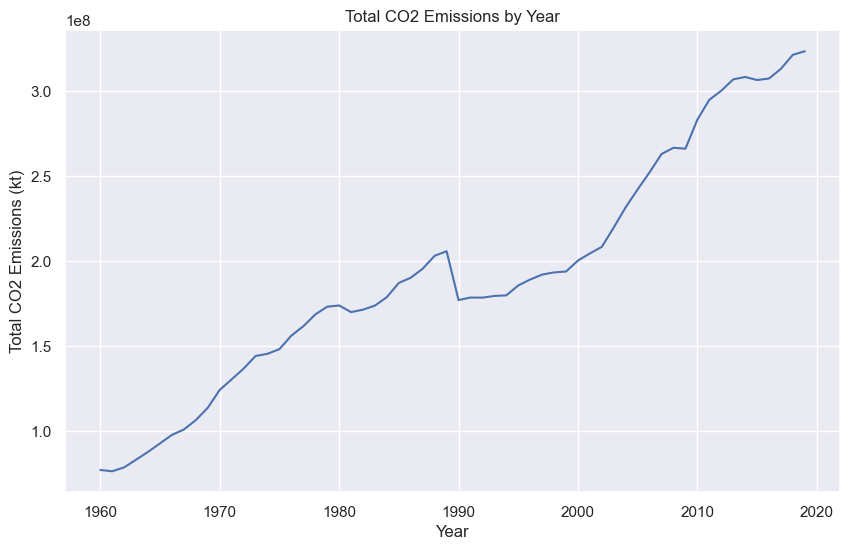

In [141]:
plt.figure(figsize=(10, 6))
sns.lineplot(x= total.index, y=total.values)
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (kt)')
plt.title('Total CO2 Emissions by Year')
plt.show()